In [51]:
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# import pyspark
# from pyspark.sql import SparkSession

In [52]:
url_reviews = 'https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Digital_Music.jsonl.gz'
df_reviews = pd.read_json(url_reviews, lines=True)


url_meta = 'https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/meta_categories/meta_Digital_Music.jsonl.gz'
df_meta = pd.read_json(url_meta, lines=True)


In [53]:
# df_reviews_local = pd.read_json('../data/raw/amazon_2023/Digital_Music.jsonl', lines=True)
# df_meta_local = pd.read_json('../data/raw/amazon_2023/meta_Digital_Music.jsonl', lines=True)
# df_reviews_local.head()

## DATA CLEANING

#### Cleaning REVIEWS

In [54]:
df_reviews.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Nice,If i had a dollar for how many times I have pl...,[],B004RQ2IRG,B004RQ2IRG,AFUOYIZBU3MTBOLYKOJE5Z35MBDA,2021-04-21 02:36:53.292,0,True
1,5,Excellent,awesome sound - cant wait to see them in perso...,[],B0026UZEI0,B0026UZEI0,AHGAOIZVODNHYMNCBV4DECZH42UQ,2011-06-15 19:52:05.000,0,True
2,5,Great service,This is a great cd. Good music and plays well....,[],B0055JSYHC,B0055JSYHC,AFGEM6BXCYHUILEOA3P2ZYBEF2TA,2021-03-15 20:06:33.006,0,True
3,1,No good,"These are not real German singers, they have a...",[],B000F9SMUQ,B000F9SMUQ,AH3OG6QD6EDJGZRVCFKV4B66VWNQ,2014-07-13 02:49:01.000,0,True
4,3,"Cool concept, so-so execution...",I first heard this playing in a Nagoya shop an...,[],B0049D1WVK,B0049D1WVK,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,2011-06-25 19:19:55.000,0,False


In [55]:
df_reviews.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

In [56]:
df_reviews.isna().sum()

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

In [57]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130434 entries, 0 to 130433
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             130434 non-null  int64         
 1   title              130434 non-null  object        
 2   text               130434 non-null  object        
 3   images             130434 non-null  object        
 4   asin               130434 non-null  object        
 5   parent_asin        130434 non-null  object        
 6   user_id            130434 non-null  object        
 7   timestamp          130434 non-null  datetime64[ns]
 8   helpful_vote       130434 non-null  int64         
 9   verified_purchase  130434 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 9.1+ MB


> Columns asin and parent_asin seem to hold identical values. Determine how many rows dont have equal columns values. If it's a small percentage, then the asin can be dropped.

In [58]:
print( 100* len(df_reviews[df_reviews.parent_asin != df_reviews.asin]) / len(df_reviews) )

0.03296686446785348


In [59]:
cols_to_drop = ['title', 'text', 'images', 'helpful_vote', 'verified_purchase', 'asin']
df_reviews.drop(cols_to_drop, axis=1, inplace=True)
df_reviews

,rating,parent_asin,user_id,timestamp
0,5,B004RQ2IRG,AFUOYIZBU3MTBOLYKOJE5Z35MBDA,2021-04-21 02:36:53.292
1,5,B0026UZEI0,AHGAOIZVODNHYMNCBV4DECZH42UQ,2011-06-15 19:52:05.000
2,5,B0055JSYHC,AFGEM6BXCYHUILEOA3P2ZYBEF2TA,2021-03-15 20:06:33.006
3,1,B000F9SMUQ,AH3OG6QD6EDJGZRVCFKV4B66VWNQ,2014-07-13 02:49:01.000
4,3,B0049D1WVK,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,2011-06-25 19:19:55.000
...,...,...,...,...
130429,5,B089NZYT26,AF5NJAIT4LBULU65RF7VHEPCSBGQ,2022-01-03 14:55:21.610
130430,5,B07D66LF8J,AGNANZSHBC7DCUQHHSYRUMSNCUZA,2020-01-20 08:56:37.233
130431,5,B07WQJZ4XQ,AHOWFPVORG6KHHI3P5QFIVQZ5XYA,2019-12-13 23:49:01.163
130432,1,B000NP1OLQ,AEA5DJGQPPBEGX4ZQJPXYVG7VITQ,2015-06-07 01:52:00.000


#### Cleaning META

In [60]:
df_meta.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,Digital Music,Baja Marimba Band,4.9,8,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],None,[],"{'Date First Available': 'February 28, 2010'}",B000V87RP2,NaN
1,Digital Music,'80s Halloween-All Original Artists & Recordings,5.0,3,[],[],14.98,[{'thumb': 'https://m.media-amazon.com/images/...,[],"Love and Rockets (Artist), Duran Duran (...",[],{'Package Dimensions': '5.55 x 4.97 x 0.54 inc...,B0062F0MJQ,NaN
2,Digital Music,TRIO +1,5.0,1,[],[CD ALBUM],57.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Rob Wasserman Format: Audio CD,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B00005GT12,NaN
3,Digital Music,"Gold and Silver: Lehar, Delibes, Lanner, Johan...",5.0,1,[],[],29.91,[{'thumb': 'https://m.media-amazon.com/images/...,[],"Franz Lehar (Composer), Leo Delibes (Com...",[],"{'Manufacturer': 'Hungaroton / White Label', '...",B0007PD2BW,NaN
4,Digital Music,Grateful Dead Dave's Picks Volume 25 Live at B...,4.9,20,[],[Sold out. Numbered limited edition],149.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],"Grateful Dead (Artist, Orchestra) Format: ...",[],{'Package Dimensions': '5.55 x 4.97 x 0.54 inc...,B079CPD45R,NaN


In [61]:
df_meta.shape

(70537, 14)

In [62]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70537 entries, 0 to 70536
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    70537 non-null  object 
 1   title            70537 non-null  object 
 2   average_rating   70537 non-null  float64
 3   rating_number    70537 non-null  int64  
 4   features         70537 non-null  object 
 5   description      70537 non-null  object 
 6   price            40125 non-null  float64
 7   images           70537 non-null  object 
 8   videos           70537 non-null  object 
 9   store            66299 non-null  object 
 10  categories       70537 non-null  object 
 11  details          70537 non-null  object 
 12  parent_asin      70537 non-null  object 
 13  bought_together  0 non-null      float64
dtypes: float64(3), int64(1), object(10)
memory usage: 7.5+ MB


In [63]:
# Get % of empty lists [] in cols of interest and delete if it exceeds threshold values

threshold = 0.25
cols_of_interest = ['features', 'videos', 'categories'] #-- Exclude description as it can be used in feature groups down the line.

for col in cols_of_interest:

    pct = sum(~df_meta[col].astype(bool)) / len(df_meta)
    print(f'Empty [{col}] : {100*pct:.2f}%')
    
    # Drop column if it exceeds threshold value for empty list
    if pct >= threshold:
        df_meta.drop(col, axis=1, inplace=True)

df_meta.head(2)  

Empty [features] : 99.90%
Empty [videos] : 99.79%
Empty [categories] : 99.99%


,main_category,title,average_rating,rating_number,description,price,images,store,details,parent_asin,bought_together
0,Digital Music,Baja Marimba Band,4.9,8,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,None,"{'Date First Available': 'February 28, 2010'}",B000V87RP2,NaN
1,Digital Music,'80s Halloween-All Original Artists & Recordings,5.0,3,[],14.98,[{'thumb': 'https://m.media-amazon.com/images/...,"Love and Rockets (Artist), Duran Duran (...",{'Package Dimensions': '5.55 x 4.97 x 0.54 inc...,B0062F0MJQ,NaN


In [64]:
# Drop other columns that are not needed in the analysis
# Although [store] has missing list values, it contains additional details that might be of help with the search, so we keep it for now. 
# Price is not needed for this analysis so we drop it for now. 
# average_rating and rating number can be dropped as well 

cols_to_drop = ['main_category', 'images', 'bought_together', 'price', 'average_rating', 'rating_number']
df_meta.drop(cols_to_drop, axis=1, inplace=True )
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70537 entries, 0 to 70536
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        70537 non-null  object
 1   description  70537 non-null  object
 2   store        66299 non-null  object
 3   details      70537 non-null  object
 4   parent_asin  70537 non-null  object
dtypes: object(5)
memory usage: 2.7+ MB


### Merging meta and reviews

In [65]:
df = pd.merge(df_meta, df_reviews, how='right', on='parent_asin')
df.head()

,title,description,store,details,parent_asin,rating,user_id,timestamp
0,Good Things,[],Aloe Blacc Format: Audio CD,{'Package Dimensions': '5.55 x 4.97 x 0.54 inc...,B004RQ2IRG,5,AFUOYIZBU3MTBOLYKOJE5Z35MBDA,2021-04-21 02:36:53.292
1,Sugar Red Drive,[],Sugar Red Drive Ralph Farris Format: Audio CD,{'Package Dimensions': '5.4 x 4.9 x 0.3 inches...,B0026UZEI0,5,AHGAOIZVODNHYMNCBV4DECZH42UQ,2011-06-15 19:52:05.000
2,Body + Soul: The '70s (Time-Life),[],"Joe Simon (Artist), Teddy Pendergrass (A...",{},B0055JSYHC,5,AFGEM6BXCYHUILEOA3P2ZYBEF2TA,2021-03-15 20:06:33.006
3,"Aventura, Haiducïï, Kate Ryan, Fanta 4, Laith ...",[],Format: Audio CD,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B000F9SMUQ,1,AH3OG6QD6EDJGZRVCFKV4B66VWNQ,2014-07-13 02:49:01.000
4,GOSSIP PARTY! -THE BEST OF CELEB HITS R&B N HO...,[CD ALBUM],D.locke Format: Audio CD,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B0049D1WVK,3,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,2011-06-25 19:19:55.000


In [66]:
df.shape

(130434, 8)

## EDA

#### Summary Statistics

In [78]:
# Info on counts

n_products = df.parent_asin.nunique()
n_titles = df.title.nunique()
n_ratings = len(df.rating)
n_users = df.user_id.nunique()

print(f'Total unique products: {n_products}')
print(f'Total unique poduct name: {n_titles}')
print(f'Total ratings: {n_ratings}')
print(f'Total unique users: {n_users}')

Total unique products: 70511
Total unique poduct name: 68417
Total ratings: 130434
Total unique users: 100952


In [69]:
# Summary Statistics

avg_rating_p_product = round(n_ratings/n_products, 2)
avg_rating_p_user = round(n_ratings/n_users, 2)

print(f'Average rating per product: {avg_rating_p_product}')
print(f'Average rating per user: {avg_rating_p_user}')

Average rating per product: 1.85
Average rating per user: 1.29


In [70]:
df.select_dtypes('number').describe()

,rating
count,130434.000000
mean,4.532837
std,1.027994
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


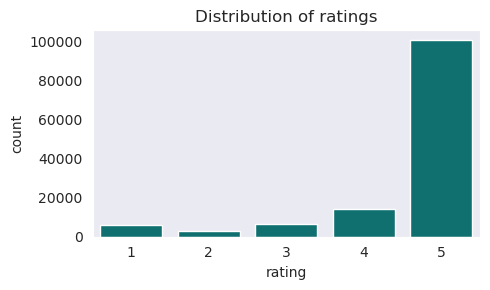

In [74]:
# Distribution of ratings

sns.set_style('dark')
plt.figure(figsize=(5,3))

_ = sns.countplot(data=df, x='rating', color='teal')
_.set_title('Distribution of ratings')
plt.tight_layout()
plt.show()


In [ ]:
most_rated = df.parent_asin.value_counts()[0:9]

parent_asin
B00003CXKT    398
5559166928    319
B001EJH4SW    215
B0000041CD    178
B00A44I5M2    164
B000002TYX    154
B000058983    151
1401923119    151
B000002TYZ    146
Name: count, dtype: int64

In [ ]:
# Distribution of average_rating and rating_number

# cols_numeric = df.select_dtypes(exclude=['object','datetime']).columns

# sns.set_style('dark', {'axes.grid':False})
# # fig, axes = plt.subplots(1,2, figsize=(10,3))

# for idx,col in enumerate(cols_numeric):
#     # sns.boxplot(data=df_meta, x=col, ax=axes[idx])
#     plt.subplot(1,1,idx+1,figsize=(5,3))
#     sns.countplot(data=df, x=col, ax=axes[idx])
#     # sns.histplot(data=df_meta, x=col, bins=20, ax=axes[idx], kde=True, color='teal', alpha=0.5)
#     axes[idx].set_title(f'Distribution of {str(col).replace('_', ' ').capitalize()}')
#     axes[idx].axvline(x=df[col].mean(), ls='--', linewidth=1, color='red')
# # plt.tight_layout()
# plt.show()

AttributeError: Axes.set() got an unexpected keyword argument 'figsize'

<Figure size 640x480 with 0 Axes>

In [19]:
cols_numeric

Index(['rating'], dtype='object')

#### Outlier Detection

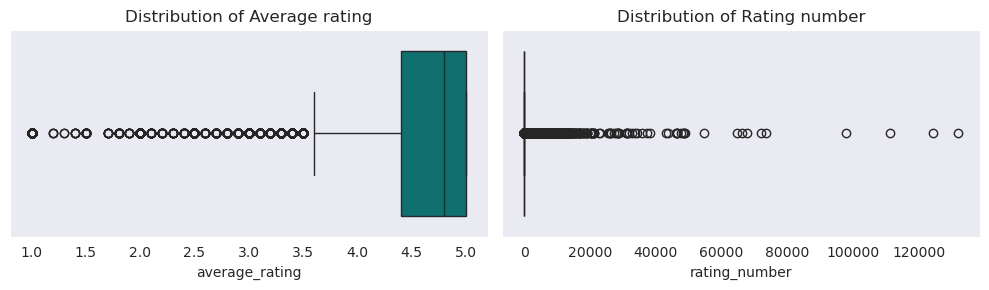

In [ ]:
# Distribution of average_rating and rating_number - boxplot

sns.set_style('dark', {'axes.grid':False})

fig, axes = plt.subplots(1,2, figsize=(10,3))

for idx,col in enumerate(cols_numeric):
    sns.boxplot(data=df_meta, x=col, ax=axes[idx], color='teal')
    axes[idx].set_title(f'Distribution of {str(col).replace('_', ' ').capitalize()}')
    # plt.title()
    # plt.axvline(x=df_meta[col].mean(), ls='--', linewidth=1, color='red', axis=ax[idx])
plt.tight_layout()
plt.show()

In [19]:
# UDF: Function for extracting outliers and non-outliers from a dataframe

def process_outliers(data_df: pd.DataFrame, col: str, is_outlier = True) -> pd.DataFrame:
    '''Desc: Custom function for extracting outliers or non-outliers depending on the is_outlier argument.
    
    Input: 
        data_df: pd.DataFrame - dataframe to process
        col: str - column to process
        is_outlier: bool - If True (by default) will extract outliers; otherwise, non-outliers'''
    
    q1 = data_df[col].quantile(0.25)
    q3 = data_df[col].quantile(0.75)
    iqr = q3 - q1
    if is_outlier:
        result = data_df[((data_df[col] < (q1 - 1.5 * iqr)) | (data_df[col] > (q3 + 1.5 * iqr)))] #.any(axis=1)]
    else:
        result = data_df[~((data_df[col] < (q1 - 1.5 * iqr)) | (data_df[col] > (q3 + 1.5 * iqr)))] #.any(axis=1)]
        
    return result

In [20]:
# Highly rated items that are outliers

df_ol = process_outliers(df_meta, 'rating_number', is_outlier=True)
df_ol.sort_values('rating_number', ascending=False).head(5)

,title,average_rating,rating_number,description,store,details,parent_asin
66915,To Kill A Mockingbird: 50th Anniversary editio...,4.7,131983,[],Harper Lee Format: Audio CD,"{'Manufacturer': 'Audiobooks', 'Date First Ava...",B00CF6CK32
33656,By Donna Tartt - The Goldfinch (Unabridged),4.1,124260,[],Donna Tartt Format: Audio CD,"{'Date First Available': 'January 12, 2014'}",B00HTJOGM8
3299,Harry Potter Audio Boxed Set,4.9,111099,[],J.K. Rowling Mary GrandPré Format: Audio CD,{},1408815435
333,Memory Man by David Baldacci (2015-04-21),4.4,97719,[],David Baldacci Format: Audio CD,"{'Manufacturer': 'Grand Central Publishing', '...",B0146V24OI
62191,Harry Potter and the Half-Blood Prince (Book 6...,4.9,73589,[],J.K. Rowling Format: Audio CD,"{'Date First Available': 'December 31, 2015'}",B012YSB3X8


#### Pairwise Relationship

> Code block disabled due to limited processing power.

In [21]:
# sns.set_style('dark', {'axes.grid':False})
# plt.figure(figsize=(10,10))
# sns.pairplot(df_meta.select_dtypes(exclude='object')).fig.suptitle('Numeric columns Pairplot', y=1.0)
# plt.tight_layout()
# plt.show()

### Content-Based Filtering

### Recommending Top Rated Items - A solution to Cold-Start problem

https://www.codementor.io/@arpitbhayani/solving-an-age-old-problem-using-bayesian-average-15fy4ww08p

In [22]:
# Input Block: Select the number of top items to show

# Placeholder:
# n_result = input(Select the number of Top products to show)

# Unit Testing:
n_result = 20
print(f'Top items to show : {n_result}')

Top items to show : 20


In [ ]:
# Retrieve Top Items to recommend

cols_to_show = ['parent_asin', 'title', 'average_rating', 'rating_number']

df_toprated = df_meta.sort_values(by=['average_rating', 'rating_number'], ascending=[False,False])
df_toprated[:n_result][cols_to_show]

,parent_asin,title,average_rating,rating_number
39937,B0785WHQX4,Twice -[Merry & Happy]1st Repackage Merry Ver ...,5.0,174
32994,B081SWY7FB,ASTRO 6st Mini Album - Blue Flame [ THE STORY ...,5.0,104
59319,B089QW9J93,Reclaimer,5.0,74
37270,B08N579558,Shinee Taemin - Never Gonna Dance Again : Act ...,5.0,73
31169,B0763RZJ94,SF9 3rd Mini Album -[KNIGHTS OF THE SUN]- CD+B...,5.0,67
1694,B01K8O4UZS,Comatose by Skillet (2006-10-02),5.0,61
16004,B08GJV2SMV,"ONEUS - LIVED, 4th Mini Album incl. CD, 96pg P...",5.0,61
49056,B00LY9S5W6,Endless Years,5.0,61
27817,B01F1FJ1XU,Forever Yours CD Rom,5.0,60
32011,B01N05ALQ0,MAMAMOO MEMORY 4th Mini Album CD+PhotoBook+Pho...,5.0,56


## PRE-PROCESSING

### Find Similar Products

In [24]:
df_meta.head()

,title,average_rating,rating_number,description,store,details,parent_asin
0,Baja Marimba Band,4.9,8,[],None,"{'Date First Available': 'February 28, 2010'}",B000V87RP2
1,'80s Halloween-All Original Artists & Recordings,5.0,3,[],"Love and Rockets (Artist), Duran Duran (...",{'Package Dimensions': '5.55 x 4.97 x 0.54 inc...,B0062F0MJQ
2,TRIO +1,5.0,1,[CD ALBUM],Rob Wasserman Format: Audio CD,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B00005GT12
3,"Gold and Silver: Lehar, Delibes, Lanner, Johan...",5.0,1,[],"Franz Lehar (Composer), Leo Delibes (Com...","{'Manufacturer': 'Hungaroton / White Label', '...",B0007PD2BW
4,Grateful Dead Dave's Picks Volume 25 Live at B...,4.9,20,[Sold out. Numbered limited edition],"Grateful Dead (Artist, Orchestra) Format: ...",{'Package Dimensions': '5.55 x 4.97 x 0.54 inc...,B079CPD45R


### Test Merge Right

In [25]:
# TEst Union ASIN = B00003CXKT OR B00A44I5M2

test_asin = 'B00A44I5M2'

meta_one = df_meta[df_meta['parent_asin'] == test_asin]
meta_one.shape


(1, 7)

In [26]:
meta_one

,title,average_rating,rating_number,description,store,details,parent_asin
21218,Amazing Grace - 40 Treasured Hymns,4.8,689,"[This luminous set, beautifully packaged, shou...",Tennessee Ernie Ford Format: Audio CD,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B00A44I5M2


In [27]:
rev_one = df_reviews[df_reviews['parent_asin']== test_asin]
rev_one.head()

,rating,asin,parent_asin,user_id,timestamp
1221,5,B00A44I5M2,B00A44I5M2,AF5WQNTBQKV7QBBKRBQ7N5M3TDXQ,2021-05-04 17:48:12.179
1607,5,B00A44I5M2,B00A44I5M2,AFHKNQ6MMAVS5DQHKSMQA3UIEUNQ,2021-06-26 21:12:01.482
1626,5,B00A44I5M2,B00A44I5M2,AFSU2WP64PLAYHJKRHORUICXFFCA,2016-02-21 02:17:21.000
2066,5,B00A44I5M2,B00A44I5M2,AED5LMSGUCDU443LODXZ4EYGEMKQ,2016-11-01 18:05:09.000
2457,4,B00A44I5M2,B00A44I5M2,AEIAFPI4OVACQ3FATZLIGP767SIA,2017-04-03 00:58:27.000


In [28]:
rev_one.shape

(164, 5)

In [29]:
x = pd.merge(meta_one, rev_one, how='right', on='parent_asin')
x.shape

(164, 11)

Is the average_rating in META == mean(REV.rating.mean())

In [30]:
rev_one.rating.mean()

4.823170731707317

In [31]:
x

,title,average_rating,rating_number,description,store,details,parent_asin,rating,asin,user_id,timestamp
0,Amazing Grace - 40 Treasured Hymns,4.8,689,"[This luminous set, beautifully packaged, shou...",Tennessee Ernie Ford Format: Audio CD,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B00A44I5M2,5,B00A44I5M2,AF5WQNTBQKV7QBBKRBQ7N5M3TDXQ,2021-05-04 17:48:12.179
1,Amazing Grace - 40 Treasured Hymns,4.8,689,"[This luminous set, beautifully packaged, shou...",Tennessee Ernie Ford Format: Audio CD,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B00A44I5M2,5,B00A44I5M2,AFHKNQ6MMAVS5DQHKSMQA3UIEUNQ,2021-06-26 21:12:01.482
2,Amazing Grace - 40 Treasured Hymns,4.8,689,"[This luminous set, beautifully packaged, shou...",Tennessee Ernie Ford Format: Audio CD,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B00A44I5M2,5,B00A44I5M2,AFSU2WP64PLAYHJKRHORUICXFFCA,2016-02-21 02:17:21.000
3,Amazing Grace - 40 Treasured Hymns,4.8,689,"[This luminous set, beautifully packaged, shou...",Tennessee Ernie Ford Format: Audio CD,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B00A44I5M2,5,B00A44I5M2,AED5LMSGUCDU443LODXZ4EYGEMKQ,2016-11-01 18:05:09.000
4,Amazing Grace - 40 Treasured Hymns,4.8,689,"[This luminous set, beautifully packaged, shou...",Tennessee Ernie Ford Format: Audio CD,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B00A44I5M2,4,B00A44I5M2,AEIAFPI4OVACQ3FATZLIGP767SIA,2017-04-03 00:58:27.000
...,...,...,...,...,...,...,...,...,...,...,...
159,Amazing Grace - 40 Treasured Hymns,4.8,689,"[This luminous set, beautifully packaged, shou...",Tennessee Ernie Ford Format: Audio CD,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B00A44I5M2,5,B00A44I5M2,AFLAYPNXYE4RIMMFNRMIK5Q7ZDWA,2016-06-27 04:08:18.000
160,Amazing Grace - 40 Treasured Hymns,4.8,689,"[This luminous set, beautifully packaged, shou...",Tennessee Ernie Ford Format: Audio CD,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B00A44I5M2,5,B00A44I5M2,AEUJ7NNW6I3B7WTW7DXNGLS5ZOQQ,2014-12-28 20:21:26.000
161,Amazing Grace - 40 Treasured Hymns,4.8,689,"[This luminous set, beautifully packaged, shou...",Tennessee Ernie Ford Format: Audio CD,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B00A44I5M2,5,B00A44I5M2,AEREKUMEWFUIOHAHPHZCOIYFDYZQ,2014-12-10 21:13:07.000
162,Amazing Grace - 40 Treasured Hymns,4.8,689,"[This luminous set, beautifully packaged, shou...",Tennessee Ernie Ford Format: Audio CD,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B00A44I5M2,5,B00A44I5M2,AHVS75RR47L2F5JQCEWVQQ7PU7AQ,2018-06-22 04:42:03.319
